#### Read and explore the given dataset.  ( Rename column/add headers, plot histograms, find data characteristics)

In [0]:
import os
import numpy as np  
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [103]:
ls -lr

total 311976
drwxr-xr-x 1 root root      4096 Jul 19 16:14 sample_data/
-rw-r--r-- 1 root root 318766497 Jul 24 08:43 ratings_Electronics.csv
-rw-r--r-- 1 root root    684858 Jul 24 04:35 bank.csv


In [104]:
col_Names=["userId", "productId", "ratings", "timestamp"]

df = pd.read_csv(os.getcwd() + '/ratings_Electronics.csv', names=col_Names)
df.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [105]:
df.shape

(7824482, 4)

In [106]:
print("Unique UserID count: %s" % str(df.userId.nunique()))
print("Unique ProductID count: %s" % str(df.productId.nunique()))

Unique UserID count: 4201696
Unique ProductID count: 476002


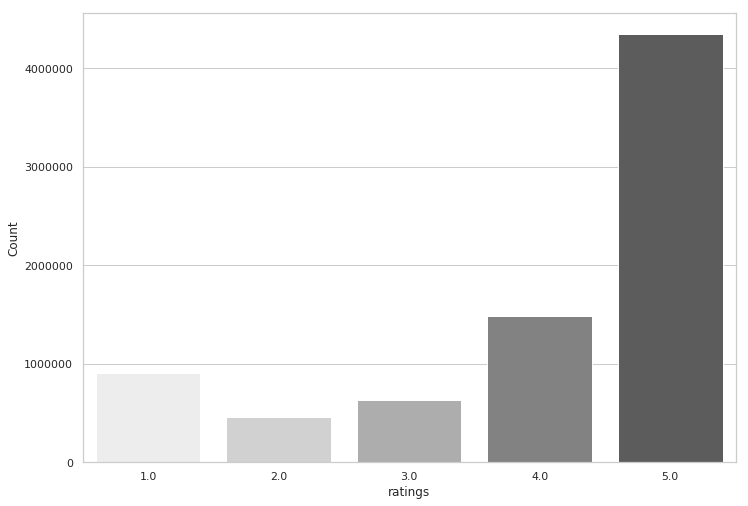

In [107]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.set_style('whitegrid')
ax = sns.countplot(x='ratings', data=df, palette=sns.color_palette('Greys'))
ax.set(xlabel='ratings', ylabel='Count')
plt.show()

#### Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )


In [108]:
product_rating = df.groupby('productId')['ratings'].mean()
product_rating.head()

productId
0132793040    5.000000
0321732944    5.000000
0439886341    1.666667
0511189877    4.500000
0528881469    2.851852
Name: ratings, dtype: float64

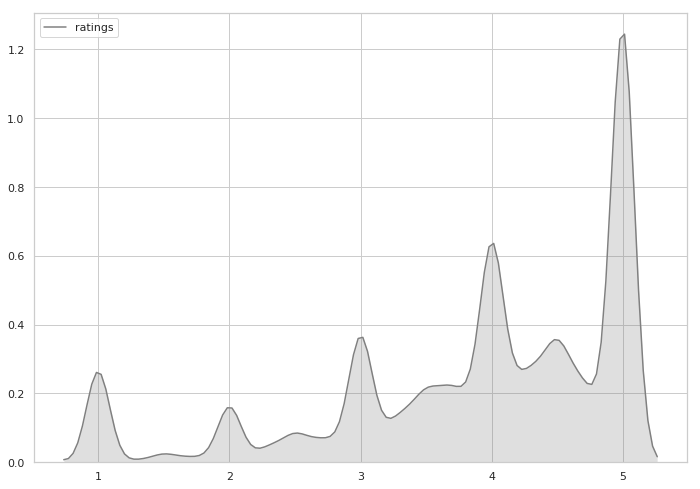

In [109]:
ax = sns.kdeplot(product_rating, shade=True, color='grey')
plt.show()

In [110]:
product_rating_count = df.groupby('productId')['ratings'].count()
product_rating_count.head()

productId
0132793040     1
0321732944     1
0439886341     3
0511189877     6
0528881469    27
Name: ratings, dtype: int64

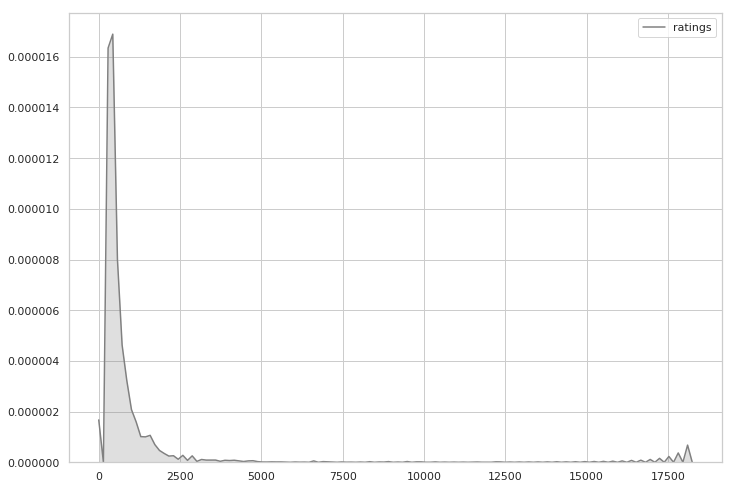

In [111]:
ax = sns.kdeplot(product_rating_count, shade=True, color='grey')
plt.show()

In [112]:
unreliability = df.groupby('productId')['ratings'].std(ddof = -1)
unreliability.head()

productId
0132793040    0.000000
0321732944    0.000000
0439886341    0.816497
0511189877    1.035098
0528881469    1.619164
Name: ratings, dtype: float64

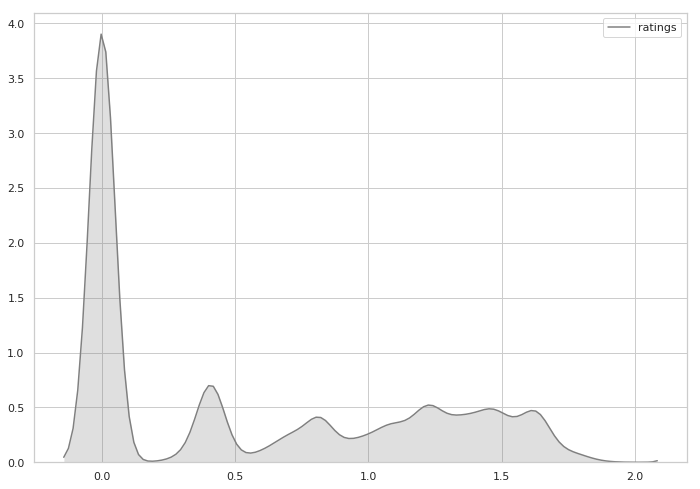

In [113]:
ax = sns.kdeplot(unreliability, shade=True, color='grey')
plt.show()

In [114]:
unique_products_list = df.productId.unique()
data_model = pd.DataFrame({'Ratings': product_rating[unique_products_list],\
                           'Count': product_rating_count[unique_products_list], \
                          'Unreliability': unreliability[unique_products_list]})
data_model.head()

,Ratings,Count,Unreliability
productId,,,
0132793040,5.000000,1,0.000000
0321732944,5.000000,1,0.000000
0439886341,1.666667,3,0.816497
0511189877,4.500000,6,1.035098
0528881469,2.851852,27,1.619164


In [115]:
print("Data model shape (number of data points): %s" % str(data_model.shape))

Data model shape (number of data points): (476002, 3)


Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

In [101]:
df_sample = []
df_sample.append(df[df['userId'] == 'AMLFNXUIEMN4T'])
df_sample = pd.concat(df_sample)
df_sample.head()

,userId,productId,ratings,timestamp
23,AMLFNXUIEMN4T,0528881469,1.0,1307836800


In [0]:
from collections import Counter

user_50 = []
for x,y in Counter(df['userId']).items():
    if (y >= 50):
        user_50.append(x);

In [118]:
df_sample = []
count = 0
for u in user_50:
    count = count+1;
    df_sample.append(df[df['userId'] == u])

df_sample = pd.concat(df_sample)
print(count)


1540


In [119]:
df_sample.shape

(125871, 4)

In [120]:
df_sample.head()

,userId,productId,ratings,timestamp
94,A3BY5KCNQZXV5U,0594451647,5.0,1390176000
14863,A3BY5KCNQZXV5U,B00000JD4V,4.0,1118016000
134213,A3BY5KCNQZXV5U,B000063574,5.0,1016668800
338368,A3BY5KCNQZXV5U,B0000CDJP8,5.0,1258761600
634048,A3BY5KCNQZXV5U,B0007Y794O,5.0,1369872000


<Figure size 1170x827 with 0 Axes>

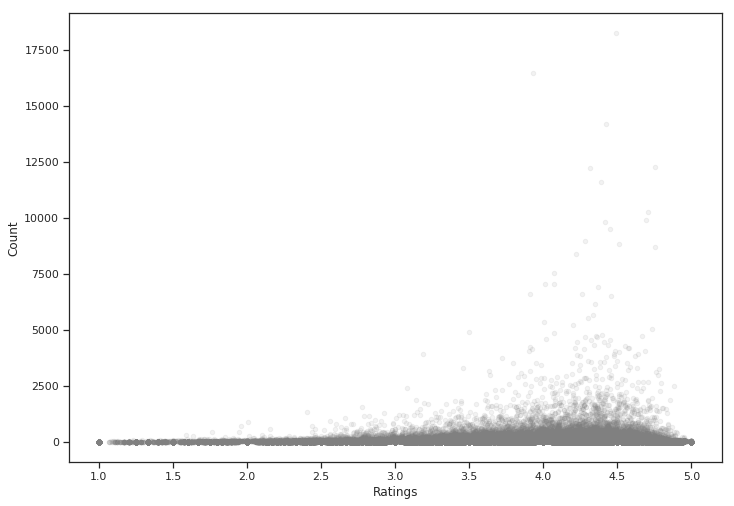

In [28]:
sns.set_style('ticks')
plt.figure(num=None, figsize=(11.7, 8.27), dpi=100, facecolor='w', edgecolor='k')

ax = data_model.plot(kind='scatter', x='Ratings', y='Count', color='grey', alpha=0.1)
plt.show()

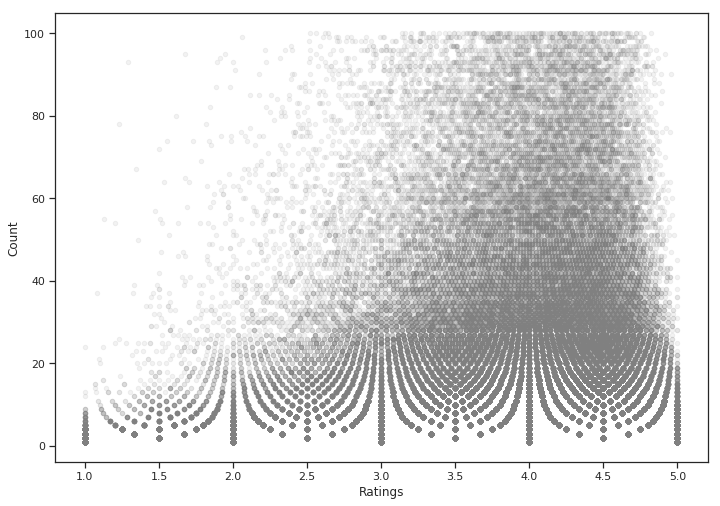

In [30]:
ax = data_model[data_model.Count < 101].plot(kind='scatter', x='Ratings', y='Count', color='grey', alpha=0.1)
plt.show()

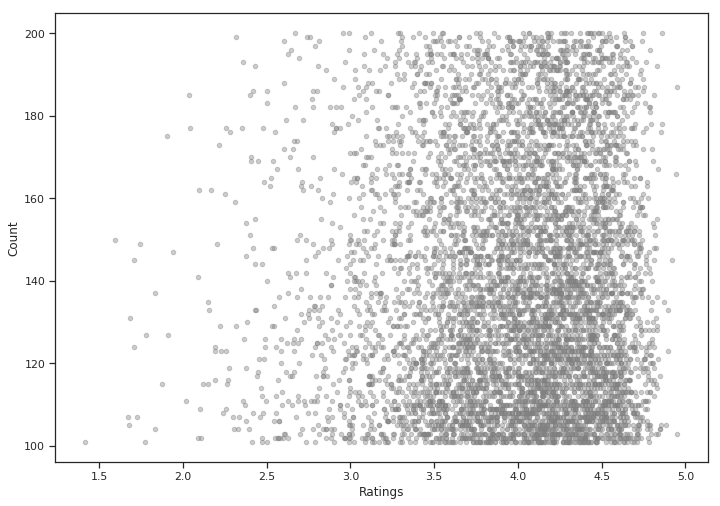

In [31]:
ax = data_model[data_model.Count > 100]\
[data_model.Count<201].plot(kind='scatter', x='Ratings', y='Count', color='grey', alpha=0.4)
plt.show()

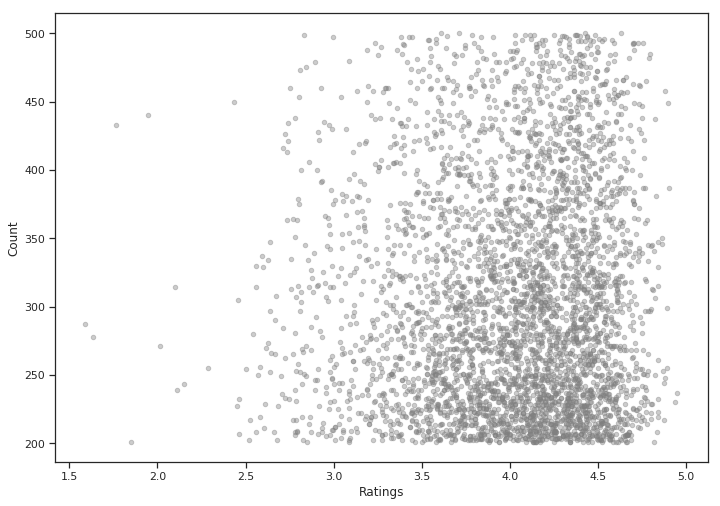

In [32]:
ax = data_model[data_model.Count > 200]\
[data_model.Count<501].plot(kind='scatter', x='Ratings', y='Count', color='grey', alpha=0.4)
plt.show()

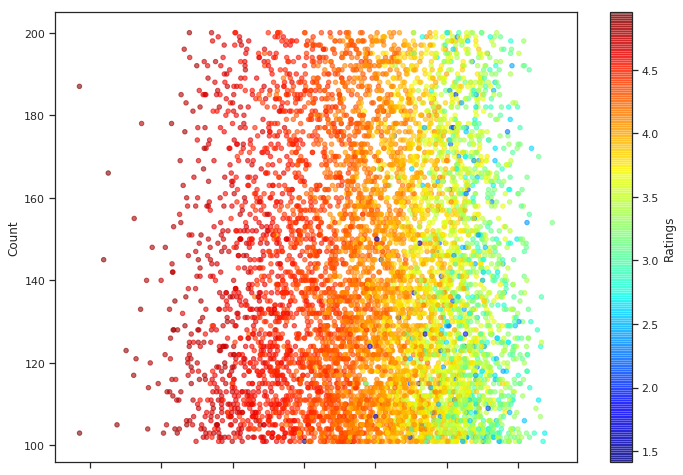

In [34]:
ax = data_model[data_model.Count > 100]\
[data_model.Count<201].plot(kind='scatter', x='Unreliability', y='Count', c='Ratings', cmap='jet', alpha=0.6)
plt.show()

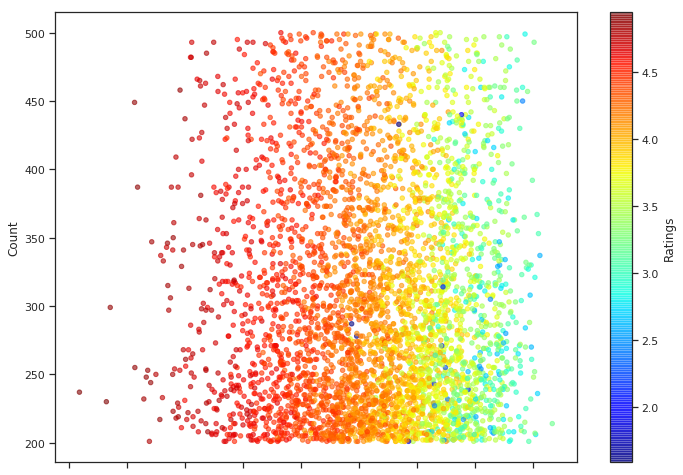

In [35]:
ax = data_model[data_model.Count > 200]\
[data_model.Count<501].plot(kind='scatter', x='Unreliability', y='Count', c='Ratings', cmap='jet', alpha=0.6)
plt.show()

In [37]:
coeff_corelation = np.corrcoef(x=data_model.Unreliability, y=data_model.Ratings)
print("Coefficient of corelation: ")
print(coeff_corelation)

Coefficient of corelation: 
[[ 1.         -0.22221797]
 [-0.22221797  1.        ]]


In [38]:
print(data_model.Count.describe())

count    476002.000000
mean         16.437918
std         112.702633
min           1.000000
25%           1.000000
50%           2.000000
75%           7.000000
max       18244.000000
Name: Count, dtype: float64


In [40]:
print(data_model.Ratings.describe())

count    476002.000000
mean          3.889700
std           1.128719
min           1.000000
25%           3.272727
50%           4.000000
75%           5.000000
max           5.000000
Name: Ratings, dtype: float64


In [41]:
print(data_model.Unreliability.describe())

count    476002.000000
mean          0.563085
std           0.617430
min           0.000000
25%           0.000000
50%           0.408248
75%           1.188965
max           1.940285
Name: Unreliability, dtype: float64


In [42]:
data_model = data_model[data_model.Count > 50][data_model.Count < 1001].copy()
print(data_model.shape)

(25093, 3)


In [0]:
def normalize(values):
    mn = values.min()
    mx = values.max()
    return(10.0/(mx - mn) * (values - mx)+10)

In [45]:
data_model_norm = normalize(data_model)
data_model_norm.head()

,Ratings,Count,Unreliability
productId,,,
1400501466,6.313657,2.096944,8.245284
1400501520,8.088588,0.326660,6.736522
1400501776,7.156849,0.927292,6.945501
1400532620,6.636020,1.264489,8.278920
1400532655,6.747779,4.562698,7.690769


In [47]:
# Recommend 20 similar items
engine = KNeighborsClassifier(n_neighbors=20)

# Training data points
data_points = data_model_norm[['Count', 'Ratings', 'Unreliability']].values

#Training labels
labels = data_model_norm.index.values

print("Data points: ")
print(data_points)
print("Labels: ")
print(labels)

engine.fit(data_points, labels)

Data points: 
[[2.09694415 6.31365655 8.24528378]
 [0.32665964 8.0885884  6.73652205]
 [0.92729189 7.15684891 6.94550086]
 ...
 [0.01053741 6.35757701 8.08456231]
 [0.07376185 6.51591095 8.2027859 ]
 [0.20021075 9.56890399 3.275159  ]]
Labels: 
['1400501466' '1400501520' '1400501776' ... 'B00KINSDK8' 'B00KWHMR6G'
 'B00L3YHF6O']


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

Recommended products: 
[Index(['B00L3YHF6O', 'B00870KSOI', 'B000SDPMEI', 'B00142MUDI', 'B001F0MFXY',
       'B00BMR7UPS', 'B00ADE3XXY', 'B00317HUWU', 'B008UGPBXM', 'B005QSXVF2',
       'B00009R6FV', 'B0020Z8PBY', 'B006RO4VEO', 'B0045JUDJ0', 'B000EHUFLI',
       'B0013LQD7Y', 'B000IBTK7U', 'B0007RSZX0', 'B00BKUYZWS', 'B004ZL9ZPG'],
      dtype='object', name='productId')]


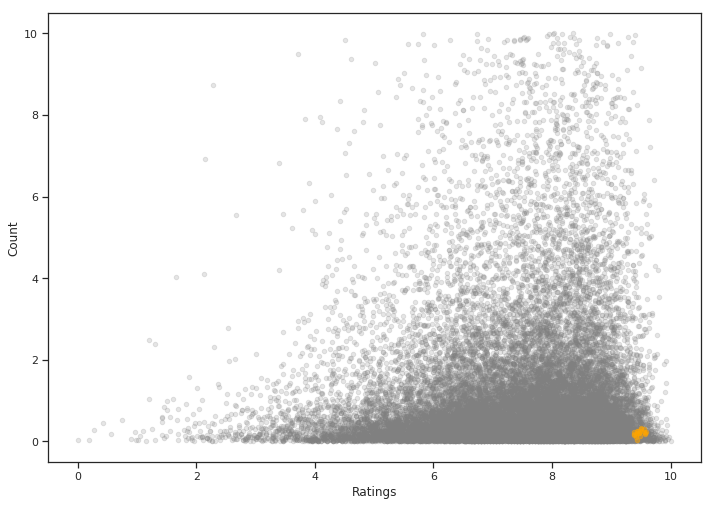

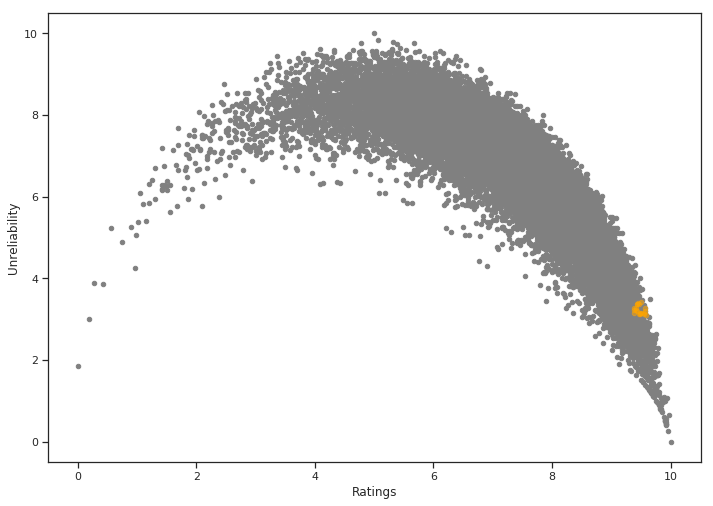

In [51]:
product_id = 'B00L3YHF6O'

product_data = [data_model_norm.loc[product_id][['Count', 'Ratings', 'Unreliability']].values]

recommended_products = engine.kneighbors(X=product_data, n_neighbors=20, return_distance=False)

# List of product IDs form the indexes

products_list = []

for each in recommended_products:
    products_list.append(data_model_norm.iloc[each].index)

print("Recommended products: ")
print(products_list)

# Showing recommended products

ax = data_model_norm.plot(kind='scatter', x='Ratings', y='Count', color='grey', alpha=0.20)
data_model_norm.iloc[recommended_products[0]].plot(kind='scatter', x='Ratings', y='Count',\
                                                   color='orange', alpha=0.5, ax=ax)

ax2 = data_model_norm.plot(kind='scatter', x='Ratings', y='Unreliability', color='grey')
data_model_norm.iloc[recommended_products[0]].plot(kind='scatter', x='Ratings', y='Unreliability',\
                                                   color='orange', alpha=0.5, ax=ax2)
plt.show()

#### Summarise your insights.

In [0]:
It is observed that when a product is selected , its respective recommended products are also listed/suggested. 